In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay 

In [2]:
file = 'Ceramic.csv'
data = pd.read_csv(file)
X = data.values[:, 2:]  #features
y = data.values[:, 1]   #target
data.describe()

,Na2O,MgO,Al2O3,SiO2,K2O,CaO,TiO2,Fe2O3,MnO,CuO,ZnO,PbO2,Rb2O,SrO,Y2O3,ZrO2,P2O5
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.00000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.471705,0.430114,17.460909,69.825114,4.978409,4.171818,0.10125,1.561591,818.750000,30.909091,95.340909,38.522727,310.454545,229.090909,42.954545,145.454545,440.909091
std,0.348779,0.215030,4.703422,2.754377,0.879467,4.305801,0.05343,0.604276,614.240607,19.096630,33.901441,26.589246,69.809414,256.011118,12.879556,60.074840,402.653944
min,0.030000,0.070000,11.300000,63.880000,2.730000,0.120000,0.04000,0.580000,180.000000,0.000000,20.000000,0.000000,180.000000,0.000000,20.000000,50.000000,50.000000
25%,0.247500,0.270000,13.007500,67.737500,4.337500,0.180000,0.07000,1.097500,380.000000,20.000000,70.000000,20.000000,250.000000,10.000000,30.000000,100.000000,97.500000
50%,0.375000,0.405000,16.205000,69.990000,5.065000,2.690000,0.08000,1.510000,590.000000,30.000000,90.000000,30.000000,320.000000,75.000000,40.000000,140.000000,365.000000
75%,0.642500,0.530000,21.707500,71.840000,5.590000,7.912500,0.13000,1.925000,982.500000,40.000000,112.500000,60.000000,370.000000,482.500000,50.000000,170.000000,697.500000
max,1.880000,1.320000,26.480000,75.950000,6.740000,13.690000,0.29000,3.110000,2970.000000,80.000000,230.000000,100.000000,450.000000,780.000000,80.000000,390.000000,1610.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ceramic Name  88 non-null     object 
 1   Part          88 non-null     object 
 2   Na2O          88 non-null     float64
 3   MgO           88 non-null     float64
 4   Al2O3         88 non-null     float64
 5   SiO2          88 non-null     float64
 6   K2O           88 non-null     float64
 7   CaO           88 non-null     float64
 8   TiO2          88 non-null     float64
 9   Fe2O3         88 non-null     float64
 10  MnO           88 non-null     int64  
 11  CuO           88 non-null     int64  
 12  ZnO           88 non-null     int64  
 13  PbO2          88 non-null     int64  
 14  Rb2O          88 non-null     int64  
 15  SrO           88 non-null     int64  
 16  Y2O3          88 non-null     int64  
 17  ZrO2          88 non-null     int64  
 18  P2O5          88 non-null     in

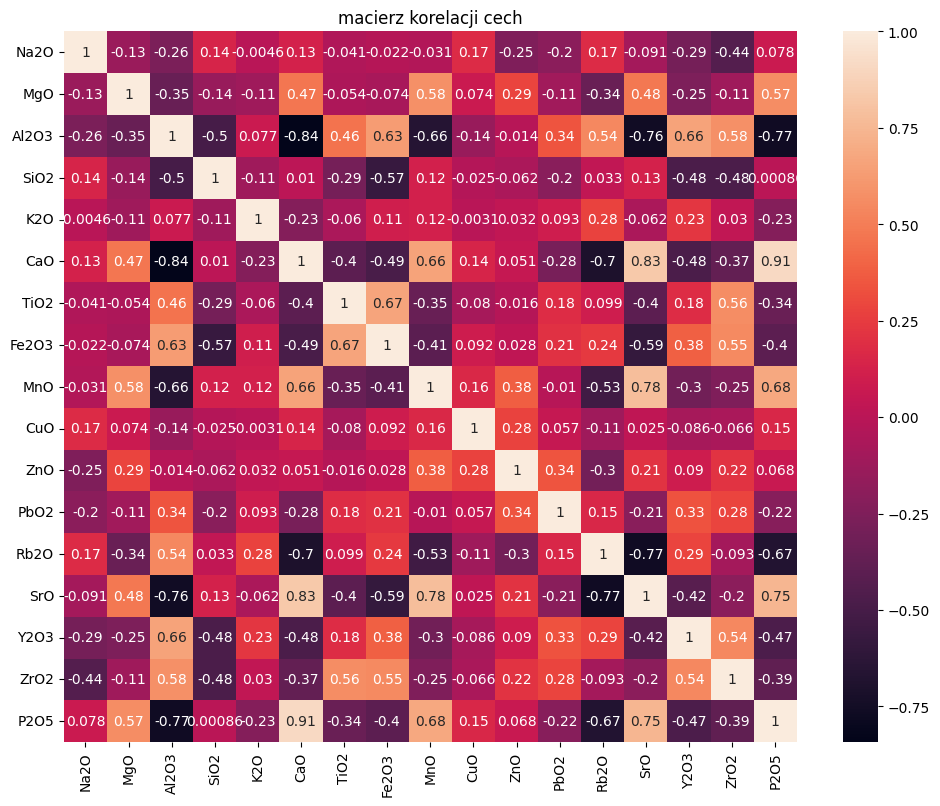

In [4]:
#macierz korelacji
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(numeric_only=True), annot=True)
plt.tight_layout()
plt.title('macierz korelacji cech')
plt.show()

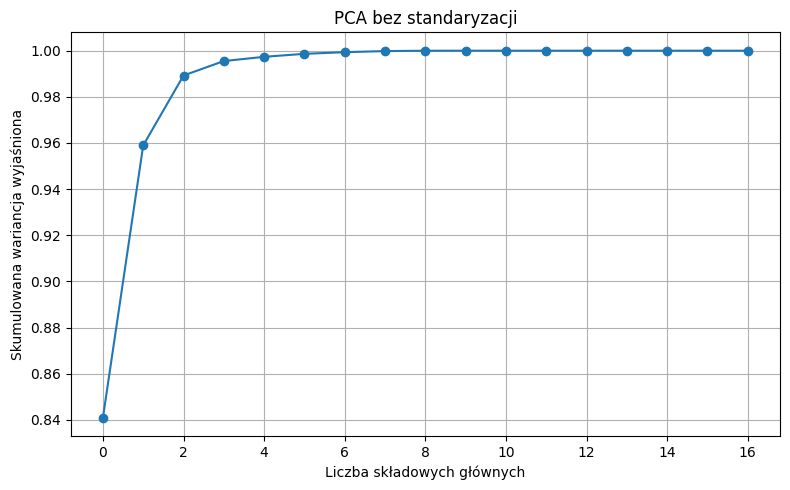

In [5]:
# pca bez standaryzacji
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance = pca.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel('Liczba składowych głównych')
plt.ylabel('Skumulowana wariancja wyjaśniona')
plt.title('PCA bez standaryzacji')
plt.grid()
plt.tight_layout()
plt.show()

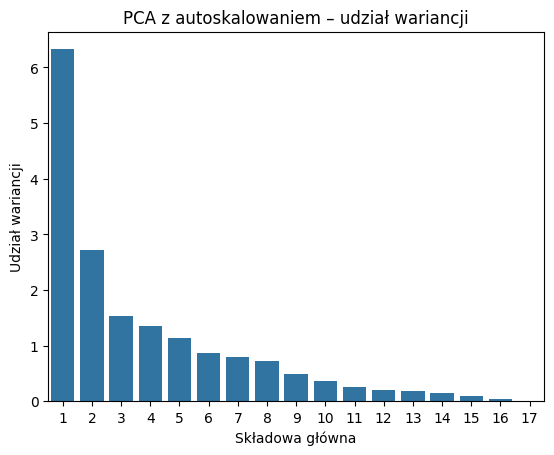

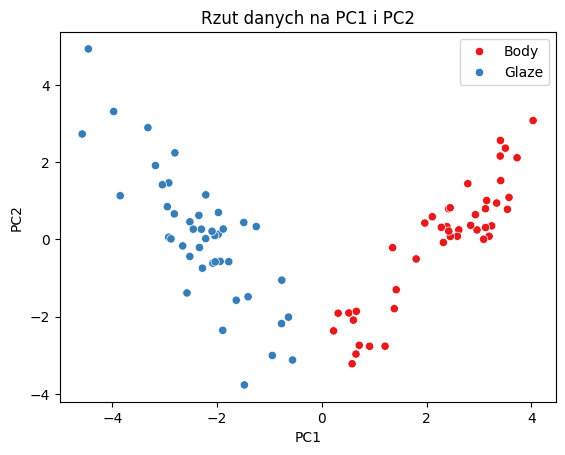

In [6]:
# pca z autoskalowaniem
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)
pca = PCA()
data_pca = pca.fit_transform(data_scaled)
sns.barplot(x=np.arange(1, len(pca.explained_variance_)+1), y=pca.explained_variance_)
plt.title("PCA z autoskalowaniem – udział wariancji")
plt.xlabel("Składowa główna")
plt.ylabel("Udział wariancji")
plt.show()

sns.scatterplot(x=data_pca[:,0], y=data_pca[:,1], hue=y, palette='Set1')
plt.title("Rzut danych na PC1 i PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [14]:
#podział na zbiór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(data_pca, y, test_size=0.3, random_state=42)

In [33]:
#random forest
rf_classifier = RandomForestClassifier(n_estimators=1, random_state=42, max_depth=2)
rf_classifier.fit(X_train, y_train)
y_test_pred = rf_classifier.predict(X_test)

In [34]:
#walidacja krzyżowa
scores = cross_val_score(rf_classifier, X, y, cv=6) 
print('Accuracy: ', scores) 
print('Accuracy (mean): ', scores.mean()) 
print('Accuracy (std): ', scores.std()) 

Accuracy:  [0.93333333 1.         1.         1.         1.         1.        ]
Accuracy (mean):  0.9888888888888889
Accuracy (std):  0.02484519974999766


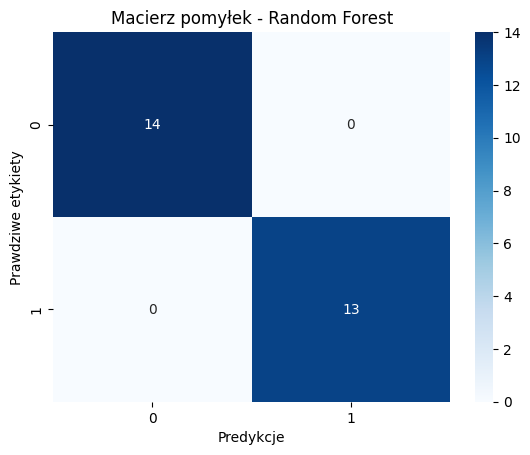


Accuracy (test): 1.0


In [ ]:
#macierz pomyłek dla testowego (random forest)
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Macierz pomyłek - Random Forest')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()
print('\nAccuracy (test):', accuracy_score(y_test, y_test_pred))

In [13]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

        Body       1.00      1.00      1.00        14
       Glaze       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



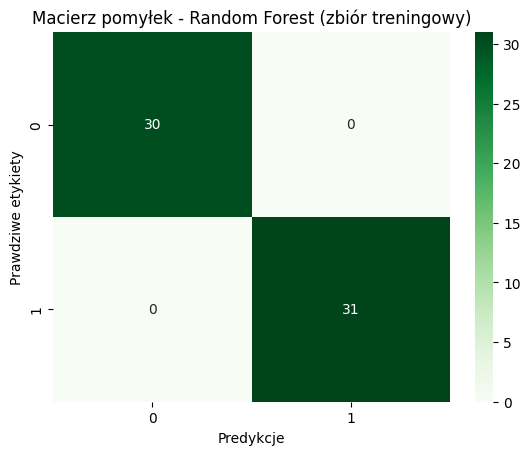


Accuracy (train): 1.0


In [ ]:
#macierz pomyłek dla zbioru treningowego (random forest)
cm_train = confusion_matrix(y_train, rf_classifier.predict(X_train))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Greens')
plt.title('Macierz pomyłek - Random Forest (zbiór treningowy)')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()
print('\nAccuracy (train):', accuracy_score(y_train, rf_classifier.predict(X_train)))

In [19]:
y_train_pred = rf_classifier.predict(X_train)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

        Body       1.00      1.00      1.00        30
       Glaze       1.00      1.00      1.00        31

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



In [31]:
#SVM
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
y_test_svm_pred = svm_classifier.predict(X_test)
print(classification_report(y_test,y_test_svm_pred))

              precision    recall  f1-score   support

        Body       1.00      1.00      1.00        14
       Glaze       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



In [32]:
#walidacja krzyżowa
scores = cross_val_score(svm_classifier, X, y, cv=6) 
print('Accuracy: ', scores) 
print('Accuracy (mean): ', scores.mean()) 
print('Accuracy (std): ', scores.std()) 

Accuracy:  [0.93333333 1.         1.         1.         1.         1.        ]
Accuracy (mean):  0.9888888888888889
Accuracy (std):  0.02484519974999766


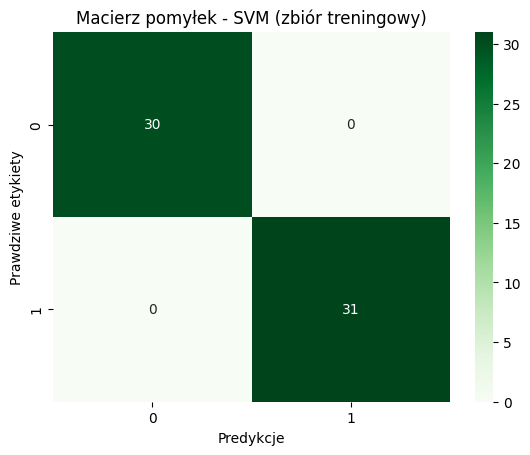


Accuracy (train SVM): 1.0


In [ ]:
#wektory svm na zbiorze treningowym
svm_train = confusion_matrix(y_train, svm_classifier.predict(X_train))
sns.heatmap(svm_train, annot=True, fmt='d', cmap='Greens')
plt.title('Macierz pomyłek - SVM (zbiór treningowy)')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()
print('\nAccuracy (train SVM):', accuracy_score(y_train, svm_classifier.predict(X_train)))

In [22]:
print(classification_report(y_train, svm_classifier.predict(X_train)))

              precision    recall  f1-score   support

        Body       1.00      1.00      1.00        30
       Glaze       1.00      1.00      1.00        31

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



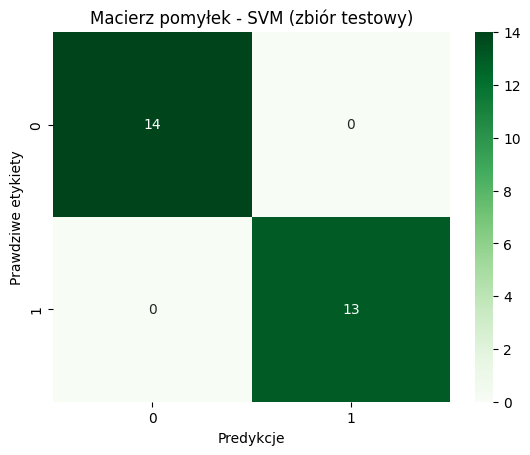


Accuracy (test SVM): 1.0


In [ ]:
# wektory SVM na zbiorze testowym
svm_train = confusion_matrix(y_test, svm_classifier.predict(X_test))
sns.heatmap(svm_train, annot=True, fmt='d', cmap='Greens')
plt.title('Macierz pomyłek - SVM (zbiór testowy)')
plt.xlabel('Predykcje')
plt.ylabel('Prawdziwe etykiety')
plt.show()
print('\nAccuracy (test SVM):', accuracy_score(y_test, svm_classifier.predict(X_test)))

In [24]:
print(classification_report(y_test, svm_classifier.predict(X_test)))

              precision    recall  f1-score   support

        Body       1.00      1.00      1.00        14
       Glaze       1.00      1.00      1.00        13

    accuracy                           1.00        27
   macro avg       1.00      1.00      1.00        27
weighted avg       1.00      1.00      1.00        27



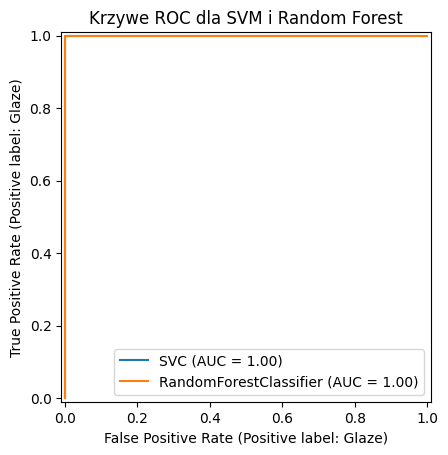

In [40]:
#ROC dla wszystkich modeli
fig, ax = plt.subplots() 
RocCurveDisplay.from_estimator(svm_classifier, X_test, y_test, ax=ax)
RocCurveDisplay.from_estimator(rf_classifier, X_test, y_test, ax=ax)
plt.title('Krzywe ROC dla SVM i Random Forest')
plt.show()